# First Explorations of the Medium dataset

The medium posts dataset was introduced in this [blog post](https://towardsdatascience.com/i-just-published-a-massive-dataset-of-medium-stories-heres-the-link-to-get-it-889bab324138) by [Harrison Jansma](https://towardsdatascience.com/@harrisonjansma) and contains metadata about $1.4$ million stories on Medium. He published this data set in the hopes of inspiring the data science community to explore the data, derive insights and cool products that will help Medium authors. This got me interested so here is my attempt to rise to the challenge. A first approach will be, of course, to do some exploratory analysis to see what we have to work with here. Then we'll see where this can take us...

I also use this opportunity to see how well I can work with [dvc](https://dvc.org) - a tool for data version control. So if you want to recreat the work, follow the (currently nonexistant) instructions in the `README.md` file in this repo to get the data and extract it using `dvc`.

## But first, some imports...

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()

In [2]:
data = pd.read_csv('../data/Medium_Clean.csv', header=0)

/home/omri/.virtualenvs/medium_stories-3UyDOJ7c/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Unnamed: 0,Title,Subtitle,Image,Author,Publication,Year,Month,Day,Reading_Time,...,Tag_travel,Tag_trump,Tag_ux,Tag_venture-capital,Tag_web-design,Tag_web-development,Tag_women,Tag_wordpress,Tag_work,Tag_writing
0,2,Online Animation: Mixamo vs Norah AI,Online animations tools provide game designers...,1,Emma Laurent,NaN,2017,8,1,5,...,0,0,0,0,0,0,0,0,0,0
1,5,A.I. ?,NaN,0,Sanparith Marukatat,NaN,2017,8,1,2,...,0,0,0,0,0,0,0,0,0,0
2,11,"Futures of AI, Friendly AI?",From Physics of the Future: How Science Will S...,1,Z,NaN,2017,8,1,3,...,0,0,0,0,0,0,0,0,0,0
3,12,The Value Generated through AI led Mindfulness,A true product co-created by the Millennials,1,Emiko Sawaguchi,MILLENNIALSTIMES,2017,8,1,5,...,0,0,0,0,0,0,0,0,0,0
4,17,"Os Melhores Links de JulhoCmeras Vintage, Goog...",mas pera a?,1,Giovani Ferreira,NEW ORDER,2017,8,1,3,...,0,0,0,0,0,0,0,0,0,0


In [7]:
tag_columns = [c for c in data.columns if c.startswith('Tag')]
non_tag_columns = [c for c in data.columns if c not in tag_columns]

In [9]:
data[non_tag_columns].head()

,Unnamed: 0,Title,Subtitle,Image,Author,Publication,Year,Month,Day,Reading_Time,Claps,url,Author_url
0,2,Online Animation: Mixamo vs Norah AI,Online animations tools provide game designers...,1,Emma Laurent,NaN,2017,8,1,5,12.0,https://medium.com/@laurentemma/online-animati...,https://medium.com/@laurentemma
1,5,A.I. ?,NaN,0,Sanparith Marukatat,NaN,2017,8,1,2,11.0,https://medium.com/@sanparithmarukatat/a-i-%E0...,https://medium.com/@sanparithmarukatat
2,11,"Futures of AI, Friendly AI?",From Physics of the Future: How Science Will S...,1,Z,NaN,2017,8,1,3,1.0,https://medium.com/@otherside914/futures-of-ai...,https://medium.com/@otherside914
3,12,The Value Generated through AI led Mindfulness,A true product co-created by the Millennials,1,Emiko Sawaguchi,MILLENNIALSTIMES,2017,8,1,5,4.0,https://millennials-times.com/creativeflower-e...,https://millennials-times.com/@emikosawaguchi
4,17,"Os Melhores Links de JulhoCmeras Vintage, Goog...",mas pera a?,1,Giovani Ferreira,NEW ORDER,2017,8,1,3,56.0,https://medium.com/neworder/os-melhores-links-...,https://medium.com/@gferreira


/home/omri/.virtualenvs/medium_stories-3UyDOJ7c/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/omri/.virtualenvs/medium_stories-3UyDOJ7c/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator shoul

KeyboardInterrupt: 

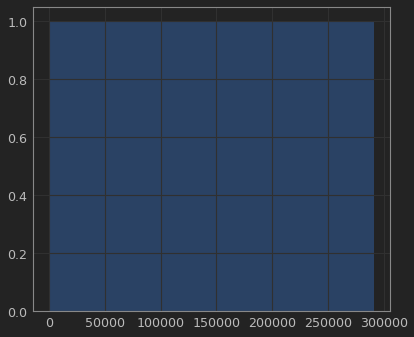

In [19]:
sns.distplot(data.Claps, kde_kws=dict(cumulative=True), hist_kws=dict(cumulative=True))